# Unit 7 Classwork

The purpose of this in-class notebook is for you to gain some experience with hypothesis testing.

## Problem 1 

Natural cork in wine bottles is subject to deterioration, and as a result wine in such bottles may experience contamination. 

The article “Effects of Bottle Closure Type on Consumer Perceptions of Wine Quality” (Amer. J. of Enology and Viticulture, 2007: 182–191) reported that, in a tasting of commercial chardonnays, 16 of 91 bottles were considered spoiled to some extent by cork-associated characteristics.

**Do these data provide strong evidence for concluding that more than $15\%$ of all such bottles are contaminated in this way?  Use a significance level $\alpha = 0.10$.**


To determine if there is strong evidence for concluding that more than 15% of all such bottles are contaminated, we can perform a hypothesis test. Let p be the proportion of all bottles that are contaminated. The null hypothesis (H0) is that p ≤ 0.15, and the alternative hypothesis (H1) is that p > 0.15. α = 0.10

In [1]:
spoiled_bottles = 16
total_bottles = 91
alpha = 0.10

result = binom.test(spoiled_bottles, total_bottles, p = 0.15, alternative = "greater")

print(result)



	Exact binomial test

data:  spoiled_bottles and total_bottles
number of successes = 16, number of trials = 91, p-value = 0.2853
alternative hypothesis: true probability of success is greater than 0.15
95 percent confidence interval:
 0.1135085 1.0000000
sample estimates:
probability of success 
             0.1758242 



## Problem #2

The goal of this problem is to learn about the distribution of $p$-values across many random samples from a normally distributed population. 

**2.(a) Consider the test $H_0: \mu = 0$ vs $H_1: \mu > 0$. Simulate a $m = 10,000$ samples of size $n = 5$ under the null hypothesis. Fix $\sigma = 1$ and assume that it is known.**

In [2]:
m <- 10000
n <- 5   
mu <- 0   
sigma <- 1 

null_samples <- matrix(rnorm(m * n, mean = mu, sd = sigma), nrow = m)
head(null_samples)

1.24996456,1.6279092,1.3782753,0.87665498,0.3696336
1.26655889,-1.3093197,0.2447690,0.13542194,0.1527361
-0.02973871,0.4876242,1.1768956,1.65237169,0.8302812
0.63054286,-0.8706858,-0.6015529,-0.09000177,0.4772356
-0.80917599,-0.5125419,-0.4935532,0.62856944,-0.2278377
0.69915265,-1.6554980,-0.2365694,1.01281680,-1.5140741


**2.(b) Calculate the $p$-value for each sample (remember, the $p$-value is calculated assuming the null hypothesis is true). Print a histogram of these $p$-values. Comment on the distribution.**

[1] 0.006932058 0.413243620 0.032783500 0.580526906 0.736502951 0.775671762

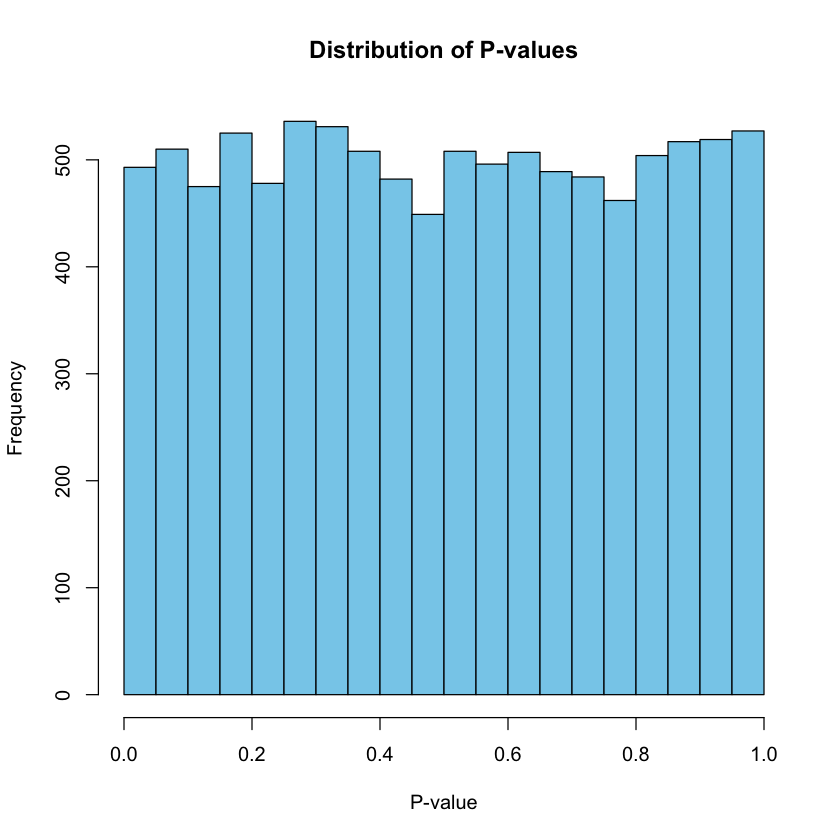

In [3]:
# Calculate p-values for each sample
null_p_values <- apply(null_samples, 1, function(sample) {
  t_stat <- (mean(sample) - mu) / (sigma / sqrt(n))
  p_value <- 1 - pnorm(t_stat)
  return(p_value)
})

# Print the first few p-values
head(null_p_values)

# Create a histogram of p-values
hist(null_p_values, breaks = 30, col = "skyblue", main = "Distribution of P-values", xlab = "P-value")

The histogram shows a relatively uniform distribution. It suggests that the p-values are behaving as expected under the null hypothesis.

**2.(c) Suppose $\alpha = 0.05$. What is the percentage of $p$-values that are less than $0.05$? How often, in this scenario, would you make a type I error? Does the answer that theory suggests match (roughly) the answer the simulation suggests?**

In [4]:
# Set alpha level
alpha <- 0.05

# Calculate the percentage of p-values less than 0.05
percentage_below_alpha <- mean(null_p_values < alpha) * 100

# Print the result
cat("Percentage of p-values below 0.05:", percentage_below_alpha, "%\n")

# Calculate the proportion of Type I errors (expected under the null hypothesis)
type_i_error_rate_theoretical <- alpha

# Calculate the proportion of Type I errors from the simulation
type_i_error_rate_simulation <- mean(null_p_values < alpha)

# Print the results
cat("Theoretical Type I error rate:", type_i_error_rate_theoretical, "\n")
cat("Simulated Type I error rate:", type_i_error_rate_simulation, "\n")

Percentage of p-values below 0.05: 4.93 %
Theoretical Type I error rate: 0.05 
Simulated Type I error rate: 0.0493 


The null hypothesis is true so the Type I error rate should be equal to the chosen significance level, which is 0.05 in this case. The simulation result is close to expected

**2.(d) Now, considering the same test, i.e.,  $H_0: \mu = 0$ vs. $H_1: \mu > 0$, simulate data under the specific alternative $\mu = 2$. Calculate the $p$-values for each sample (remember, the $p$-value is calculated assuming the null hypothesis is true). Print a histogram of these $p$-values. What does the distribution look like?**

[1] 4.283714e-05 1.810805e-03 4.754425e-08 2.886751e-04 6.751737e-06
[6] 9.737118e-06

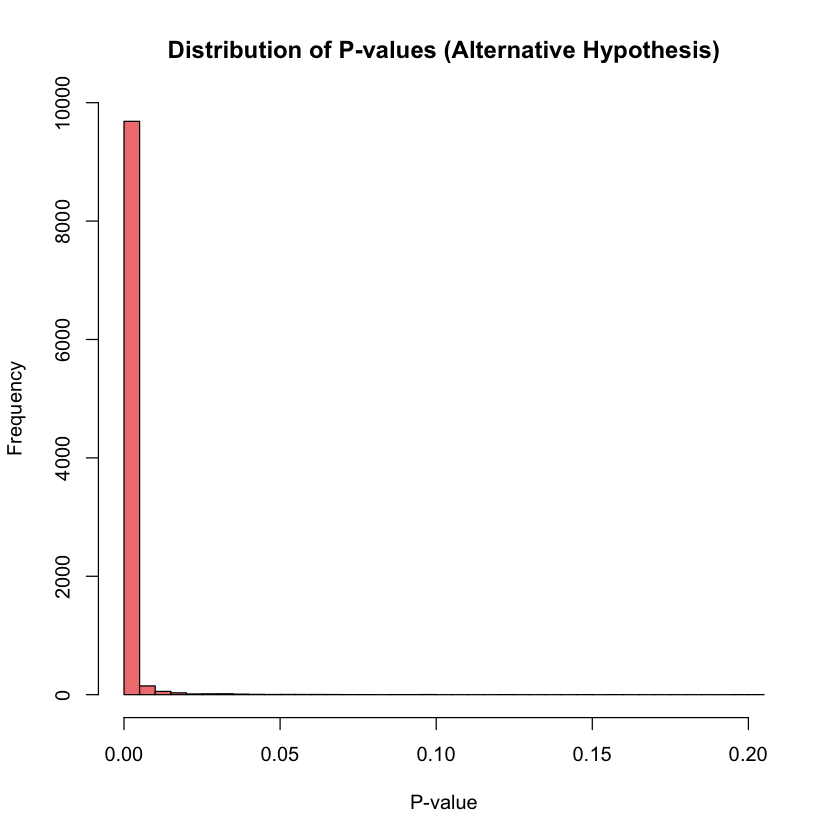

In [5]:
# Parameters for the alternative hypothesis
mu_alternative <- 2

# Simulate samples under the alternative hypothesis
alternative_samples <- matrix(rnorm(m * n, mean = mu_alternative, sd = sigma), nrow = m)

# Calculate p-values for each sample under the null hypothesis
alternative_p_values <- apply(alternative_samples, 1, function(sample) {
  t_stat <- (mean(sample) - mu) / (sigma / sqrt(n))
  p_value <- 1 - pnorm(t_stat)
  return(p_value)
})

# Print the first few p-values
head(alternative_p_values)

# Create a histogram of p-values
hist(alternative_p_values, breaks = 30, col = "lightcoral", main = "Distribution of P-values (Alternative Hypothesis)", xlab = "P-value")


In this case, under the alternative hypothesis, the distribution of p-values is skewed towards lower values. The p-values should be smaller when the alternative hypothesis is true, indicating evidence against the null hypothesis. 

**2.(e) Suppose $\alpha = 0.05$. What is the proportion of $p$-values that are greater than $0.05$? How often, in this scenario, would you make a type II error?**

In [6]:
# Set alpha level
alpha <- 0.05

# Calculate the proportion of p-values greater than 0.05 (1 - alpha)
proportion_above_alpha <- mean(alternative_p_values > alpha)

# Print the result
cat("Proportion of p-values above 0.05:", proportion_above_alpha, "\n")

# Calculate the proportion of Type II errors
type_ii_error_rate_simulation <- mean(alternative_p_values >= alpha)

# Print the result
cat("Simulated Type II error rate:", type_ii_error_rate_simulation, "\n")


Proportion of p-values above 0.05: 0.0023 
Simulated Type II error rate: 0.0023 


**2.(f) The ${\bf power}$ of a test is $1 - P(\text{Type II Error})$. That is, the power of a hypothesis test is the probability of rejecting $H_0$ when $H_1$ is true. (High powered tests are desirable!) Calculate the power of this test.**

In [7]:
# Calculate the power of the test
power_of_test <- 1 - type_ii_error_rate_simulation

# Print the result
cat("Power of the test:", power_of_test, "\n")

Power of the test: 0.9977 


**2.(g) How could you increase the power of the test? Verify your answer through simulation by changing values from above.**

We can increase sample size, adjust significance level, reduce variability, and increase effect size. 

## Problem #3



Analysis of a random sample consisting of $20$ specimens of cold-rolled steel to determine yield strengths resulted in a sample average strength of $29.8$ ksi. A second random sample of $25$ two-sided galvanized steel specimens gave a sample average strength of $34.7$ ksi.

Assuming that the two yield-strength distributions are normal with $\sigma_1 = 4.0$ and $\sigma_2 = 5.0$, does the data indicate that the corresponding true average yield strengths $\mu_1$ and $\mu_2$ are different? 

Conduct the test at significance level  $\alpha = 0.01$.

Note that $H_0: \, \mu_1 - \mu_2 = 0$, vs. $H_1: \, \mu_1 - \mu_2 \neq 0$. This is a two-tailed test.

In [8]:
# Given data
mean1 <- 29.8
mean2 <- 34.7
sd1 <- 4.0
sd2 <- 5.0
n1 <- 20
n2 <- 25
alpha <- 0.01

# Calculate the two-sample t-test statistic
t_stat <- (mean1 - mean2) / sqrt((sd1^2 / n1) + (sd2^2 / n2))

# Degrees of freedom
df <- n1 + n2 - 2

# Calculate the critical t-values for a two-tailed test
critical_t_values <- qt(c(alpha / 2, 1 - alpha / 2), df)

# Calculate the p-value
p_value <- 2 * pt(abs(t_stat), df, lower.tail = FALSE)

# Print the results
cat("Test Statistic:", t_stat, "\n")
cat("Degrees of Freedom:", df, "\n")
cat("Critical t-values:", critical_t_values, "\n")
cat("P-value:", p_value, "\n")

# Check if the null hypothesis is rejected
if (abs(t_stat) > critical_t_values[2]) {
  cat("Reject the null hypothesis at the 0.01 significance level.\n")
} else {
  cat("Fail to reject the null hypothesis at the 0.01 significance level.\n")
}

Test Statistic: -3.652244 
Degrees of Freedom: 43 
Critical t-values: -2.695102 2.695102 
P-value: 0.000700963 
Reject the null hypothesis at the 0.01 significance level.


Since the absolute value of the test statistic is greater than the critical t-value for a two-tailed test and the p-value is less than the significance level, we reject the null hypothesis. Furthermore, based on the results of the two-sample t-test, the data indicates that the corresponding true average yield strengths are different